# Introduction to Open CV

In [24]:
import cv2
import numpy as np
import urllib.request

# URL of the image
url = 'https://media.geeksforgeeks.org/wp-content/uploads/20190904230821/road.jpg'

# Download the image
resp = urllib.request.urlopen(url)
image_array = np.asarray(bytearray(resp.read()), dtype=np.uint8)

# Read the image using OpenCV
image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)

# Extracting the height and width of the image
h, w = image.shape[:2]

# Displaying the height and width
print("Height = {}, Width = {}".format(h, w))


Height = 1603, Width = 2400


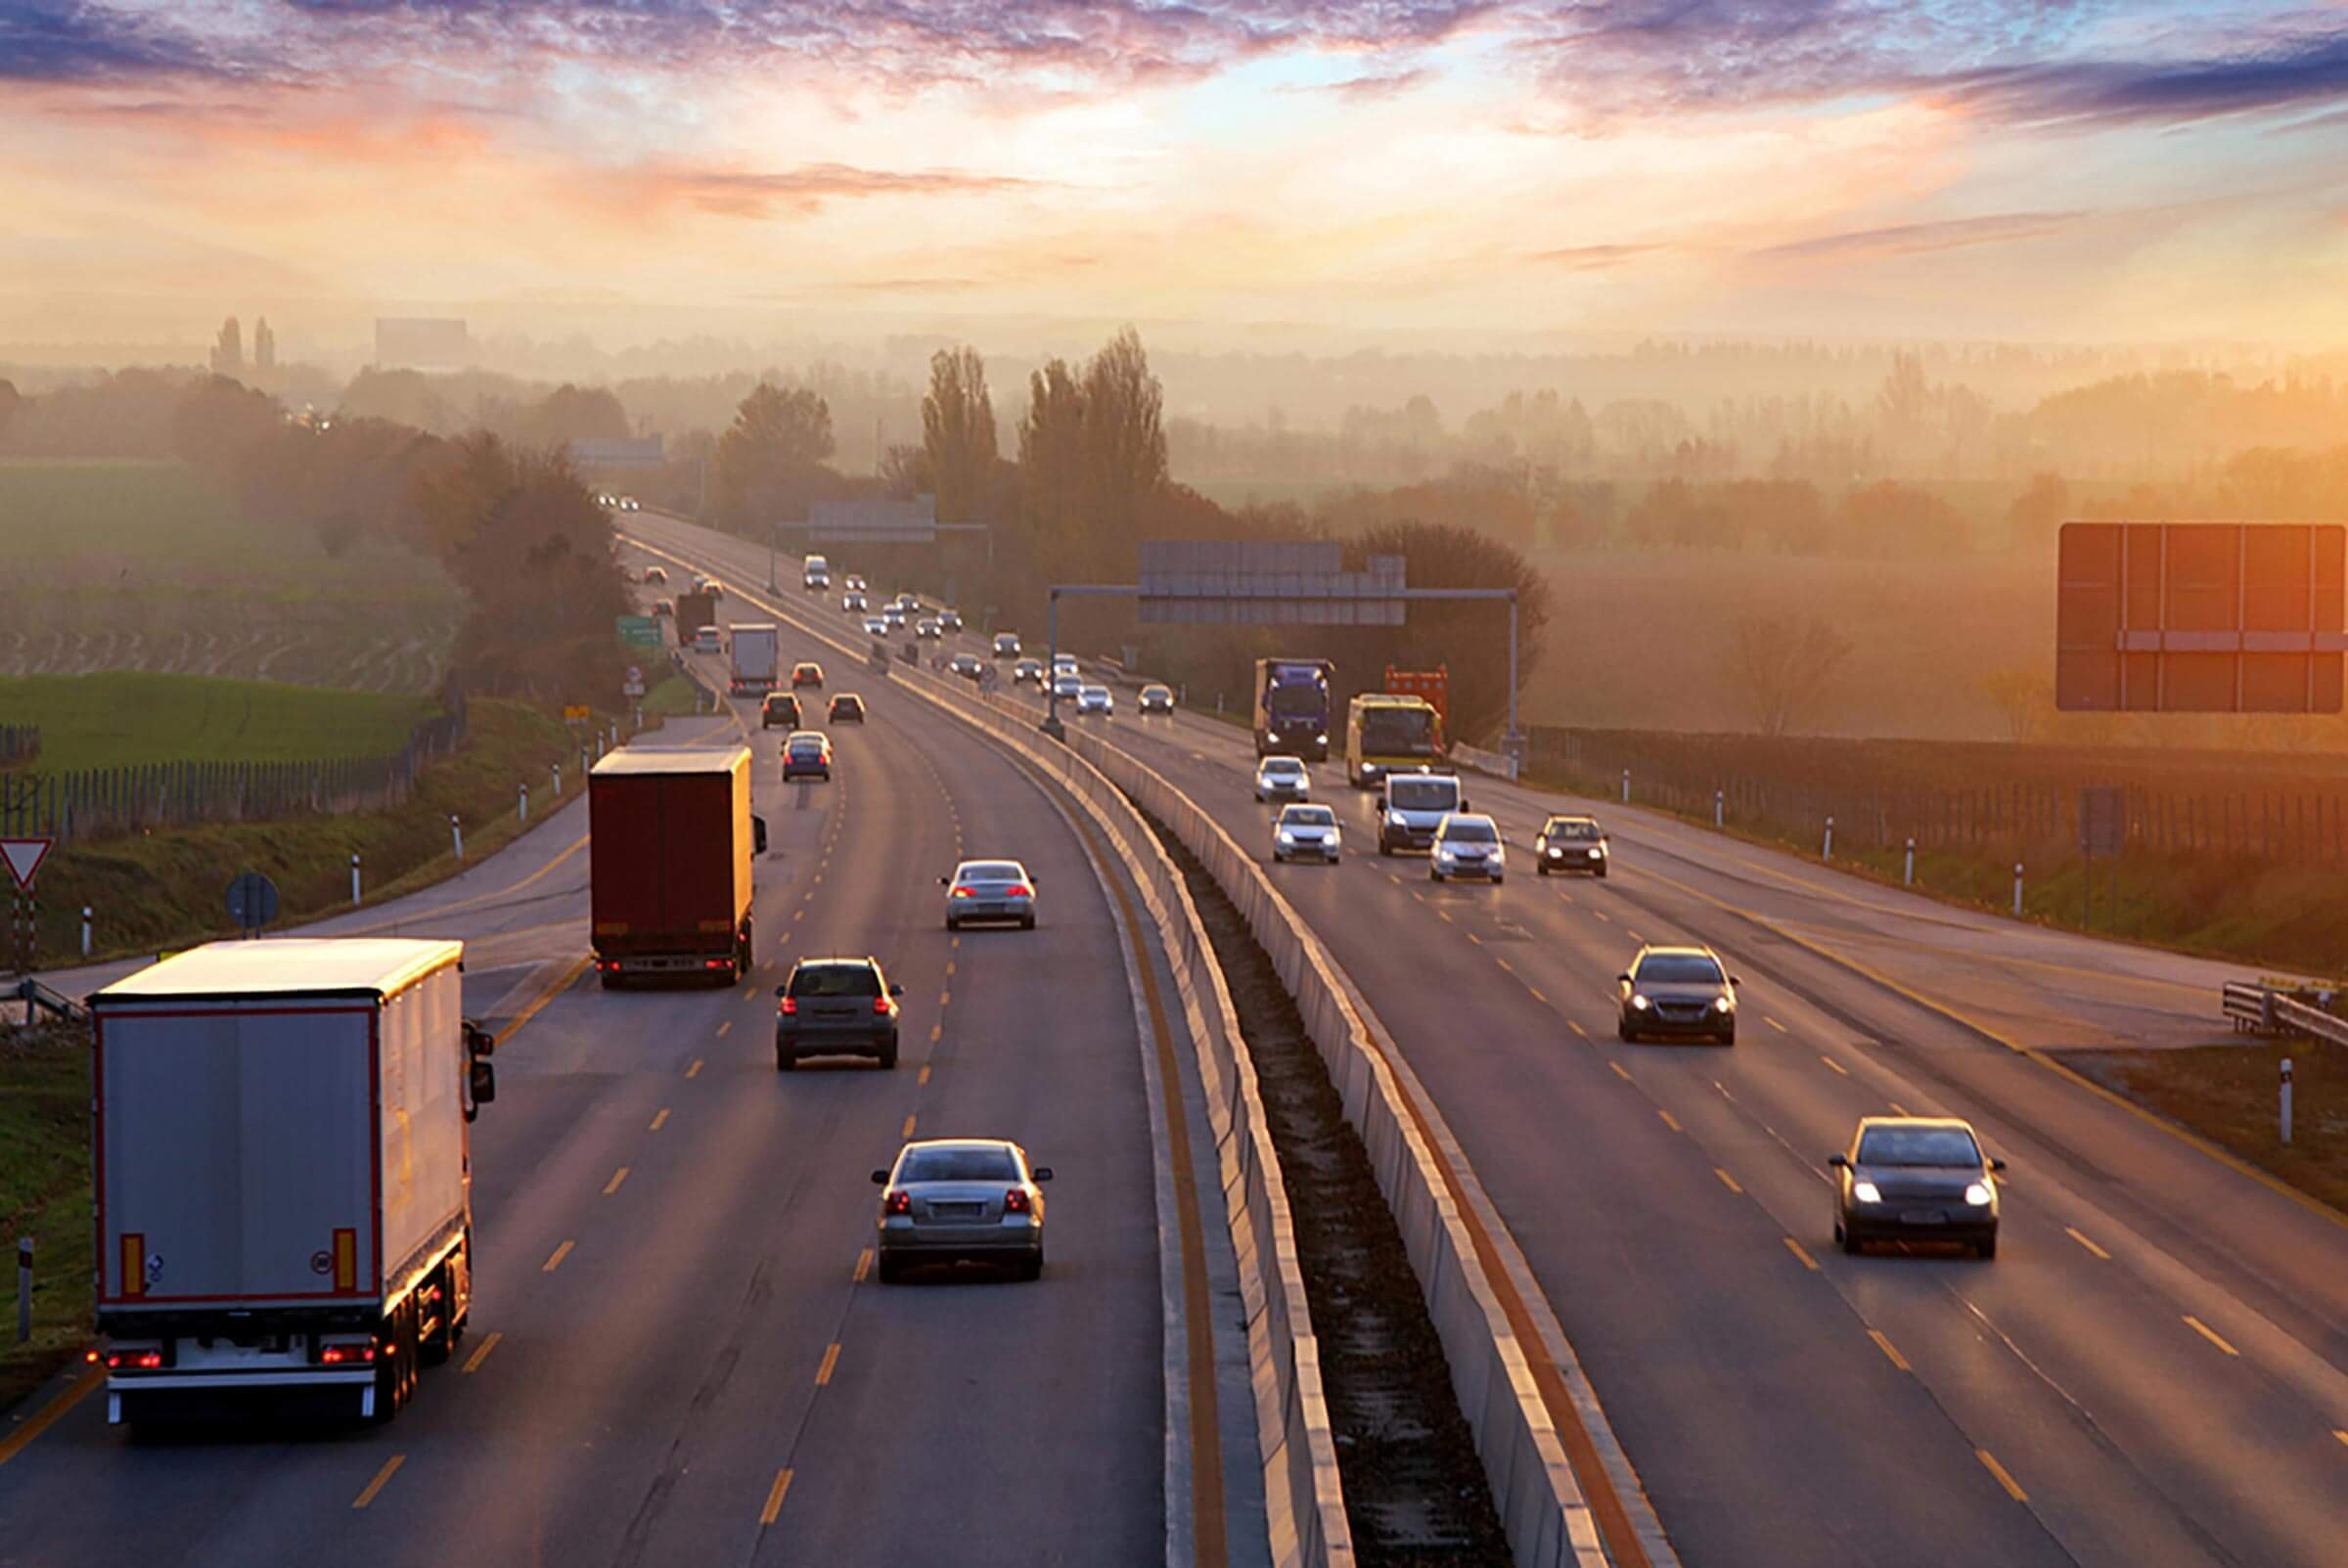

In [ ]:
from IPython.display import Image, display
# Save the image
cv2.imwrite('image.jpg', image)

# Display the image
display(Image(filename='image.jpg'))

In [ ]:
# Importing the OpenCV library
import cv2
# Reading the image using imread() function
image = cv2.imread('image.jpg')

# Extracting the height and width of an image
h, w = image.shape[:2]
# Displaying the height and width
print("Height = {},  Width = {}".format(h, w))

Height = 1603,  Width = 2400


## Extracting the RGB values of a pixel

In [ ]:
# Extracting RGB values.
# Here we have randomly chosen a pixel
# by passing in 100, 100 for height and width.
(B, G, R) = image[100, 100]

# Displaying the pixel values
print("R = {}, G = {}, B = {}".format(R, G, B))

# We can also pass the channel to extract
# the value for a specific channel
B = image[100, 100, 0]
print("B = {}".format(B))
print (image[0,0])

R = 211, G = 172, B = 165
B = 165
[153  99  88]


##Extracting the Region of Interest (ROI)

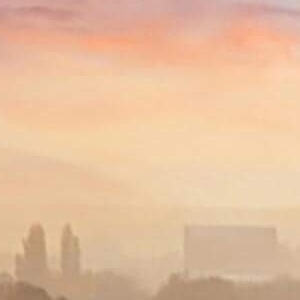

In [ ]:
# We will calculate the region of interest
# by slicing the pixels of the image
roi = image[100 : 400, 200 : 500] # vertically 100 to 400, hz 200 to 500
# Save the image
cv2.imwrite('roi.jpg', roi)

# Display the image
display(Image(filename='roi.jpg'))

### Resize

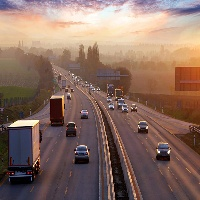

In [ ]:
# resize() function takes 2 parameters,
# the image and the dimensions
resize = cv2.resize(image, (200, 200))

# Save the image
cv2.imwrite('resize.jpg', resize)

# Display the image
display(Image(filename='resize.jpg'))

### Maintain access ratio

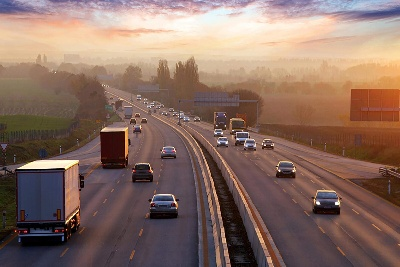

In [ ]:
# Calculating the ratio
ratio = 400 / w

# Creating a tuple containing width and height
dim = (400, int(h * ratio))

# Resizing the image
resize_aspect = cv2.resize(image, dim)

# Save the image
cv2.imwrite('resize_aspect.jpg', resize_aspect)

# Display the image
display(Image(filename='resize_aspect.jpg'))

### Rotating the Image

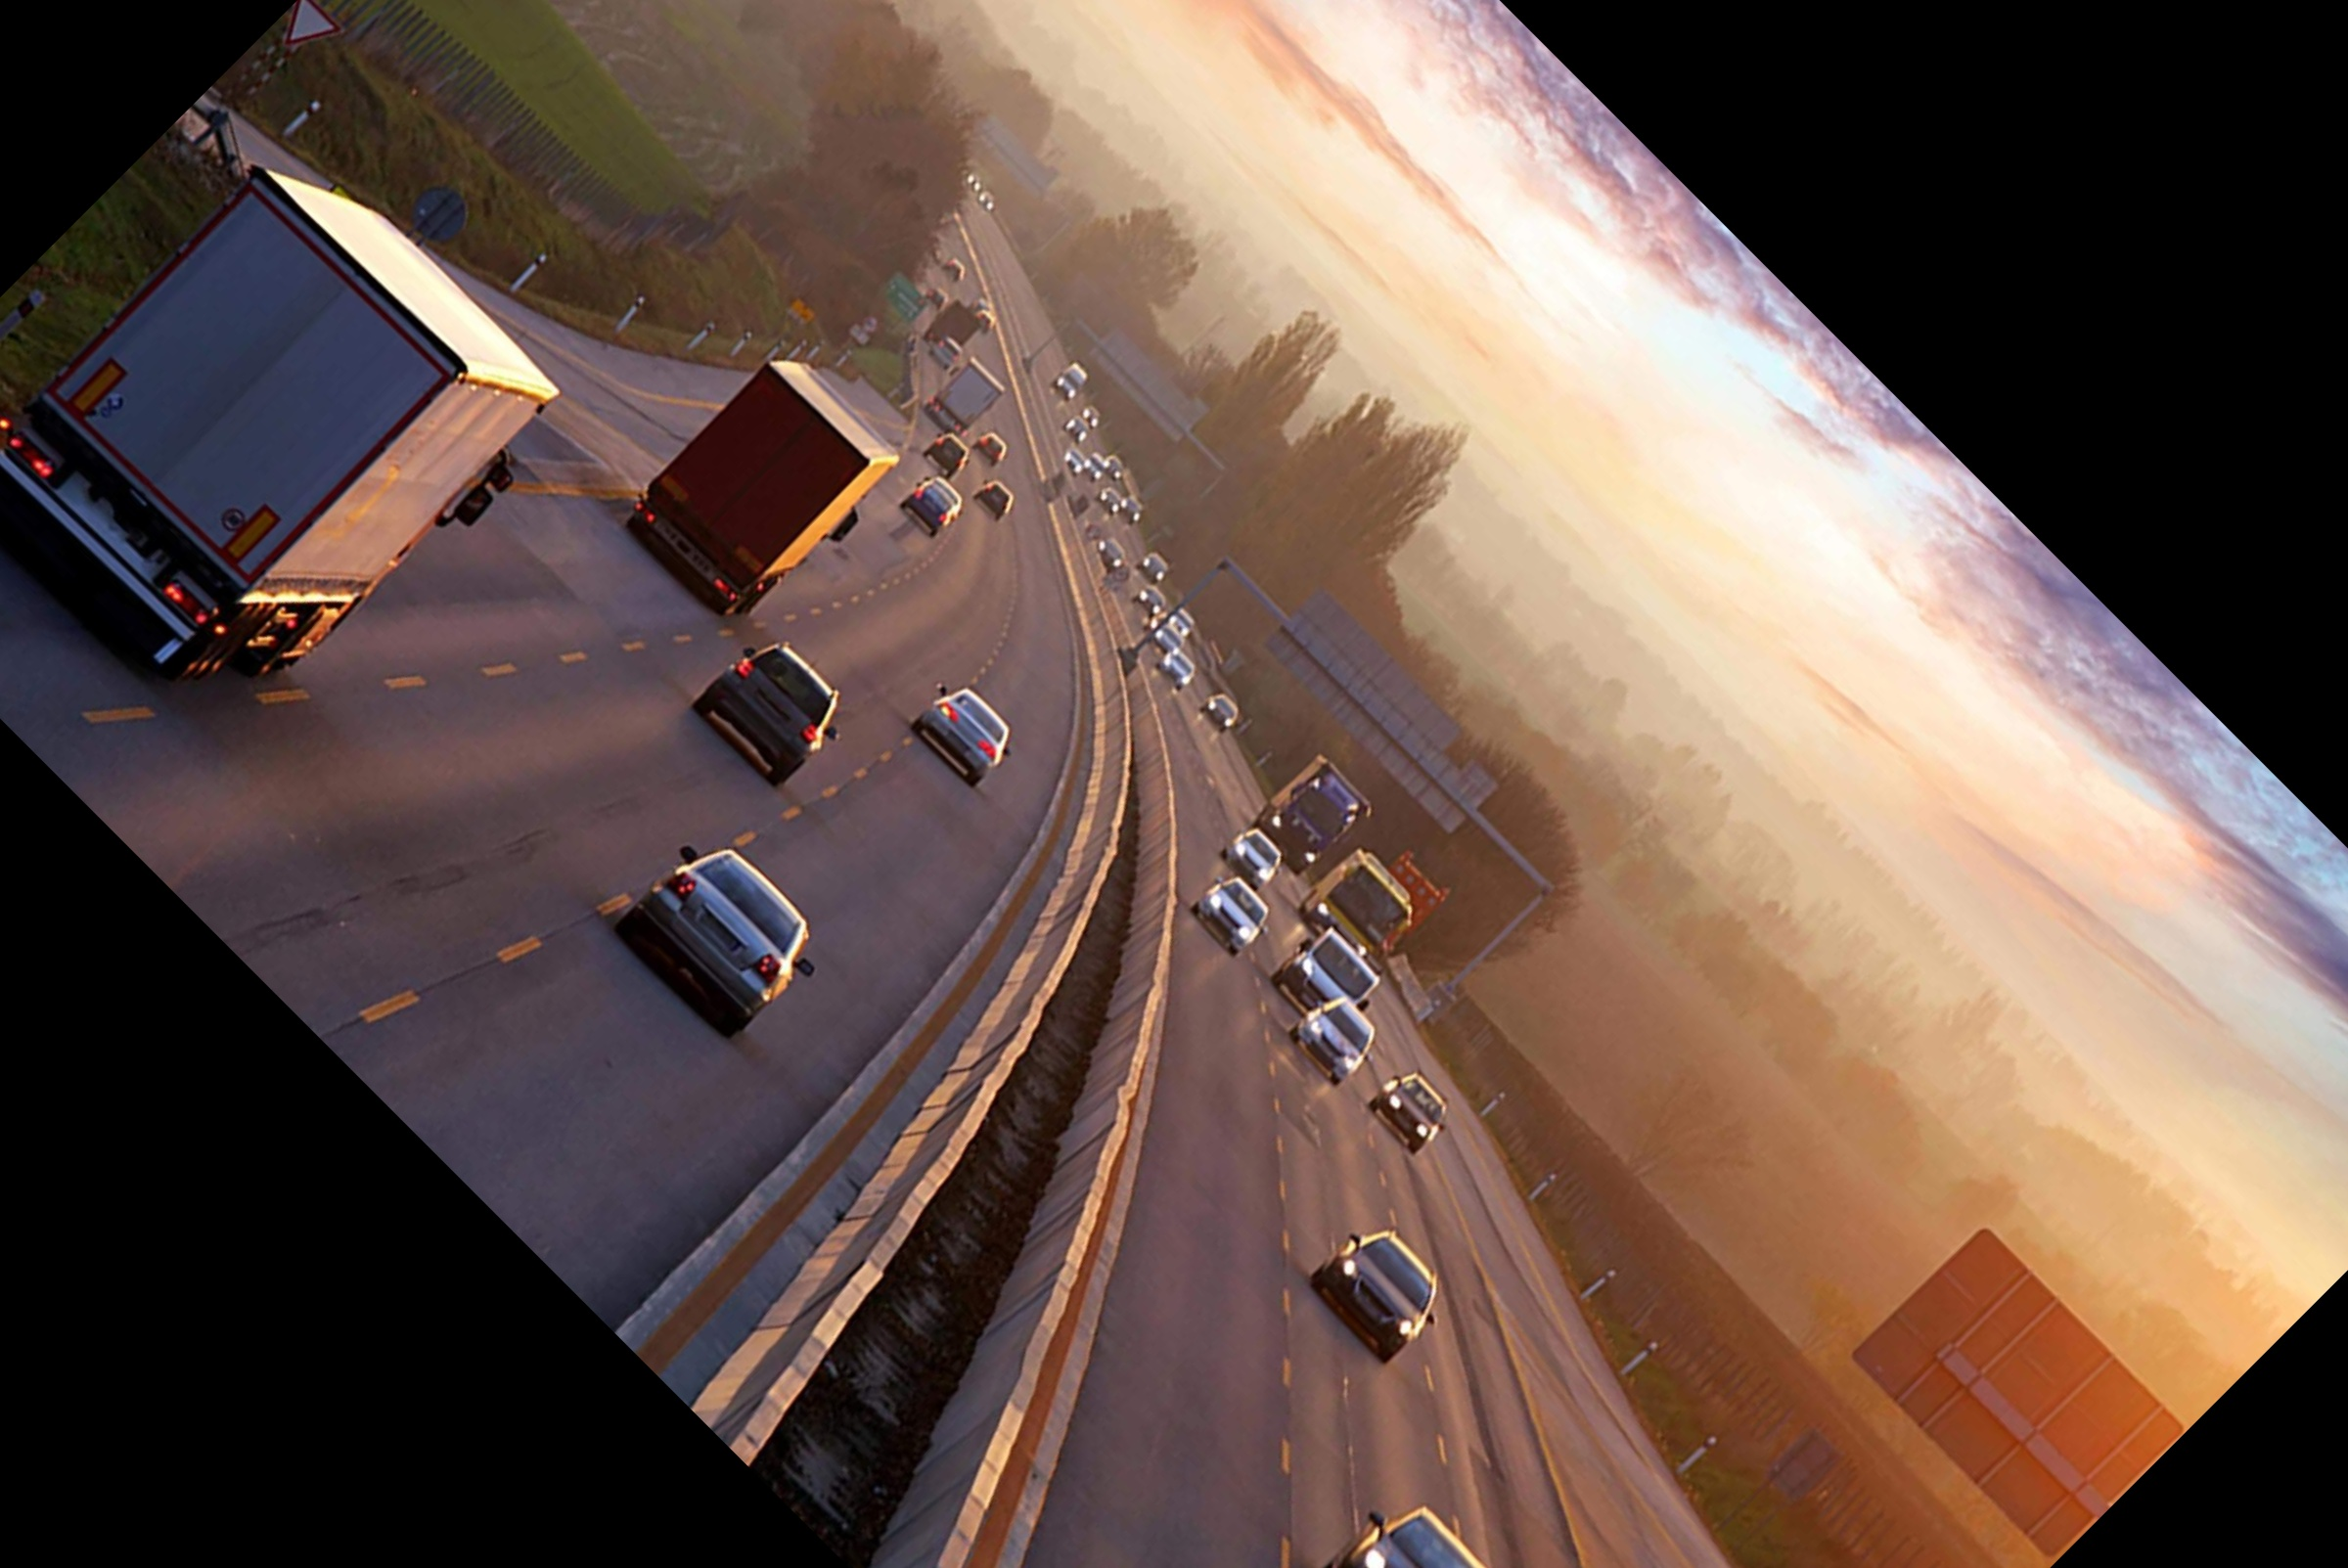

In [ ]:
# Calculating the center of the image
center = (w // 2, h // 2)

# Generating a rotation matrix
matrix = cv2.getRotationMatrix2D(center, -45, 1.0)

# Performing the affine transformation
rotated = cv2.warpAffine(image, matrix, (w, h))

# Save the image
cv2.imwrite('rotated.jpg', rotated)

# Display the image
display(Image(filename='rotated.jpg'))

### Drawing a Rectangle

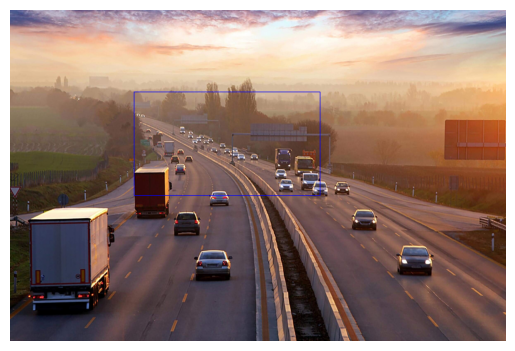

In [ ]:
from matplotlib import pyplot as plt

# We are copying the original image,
# as it is an in-place operation.
output = image.copy()

# Using the rectangle() function to create a rectangle.
rectangle = cv2.rectangle(output, (1500, 900),
                          (600, 400), (255, 0, 0), 2)
# Display the image with the rectangle using matplotlib
plt.imshow(cv2.cvtColor(rectangle, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


R G B Channels

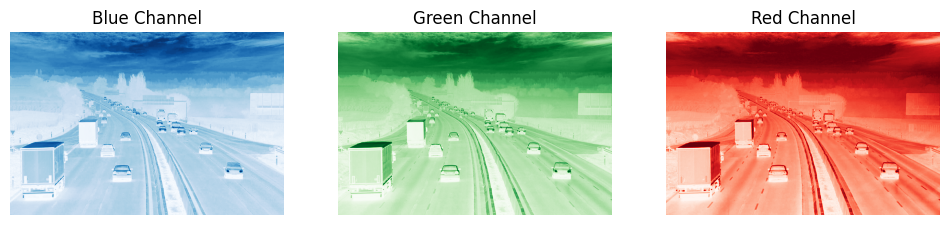

In [ ]:

# Assuming 'image' is your original image
output = image.copy()

# Splitting the image into its RGB channels
blue_channel, green_channel, red_channel = cv2.split(output)

# Display each channel separately using matplotlib
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.imshow(blue_channel, cmap='Blues')
plt.title('Blue Channel')
plt.axis('off')

plt.subplot(132)
plt.imshow(green_channel, cmap='Greens')
plt.title('Green Channel')
plt.axis('off')

plt.subplot(133)
plt.imshow(red_channel, cmap='Reds')
plt.title('Red Channel')
plt.axis('off')

plt.show()


### Gray Scaling

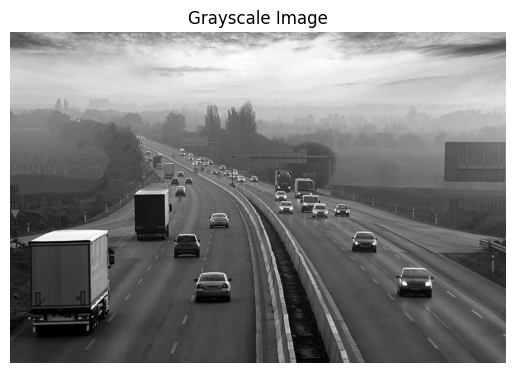

In [25]:
# Convert the image to grayscale
grayscale_image = cv2.cvtColor(output, cv2.COLOR_BGR2GRAY)

# Display the grayscale image using matplotlib
plt.imshow(grayscale_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()

### Edge detection in an Image

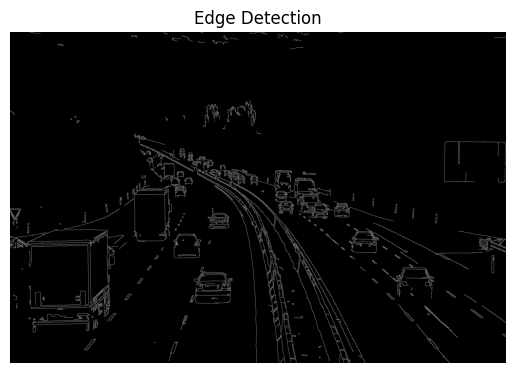

In [27]:

# Display the edge-detected image using matplotlib
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection')
plt.axis('off')
plt.show()


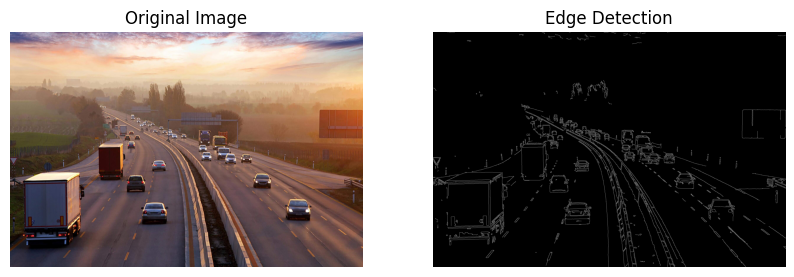

In [26]:
import cv2
from matplotlib import pyplot as plt

# Assuming 'image' is your original image
output = image.copy()

# Convert the image to grayscale
gray_image = cv2.cvtColor(output, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detection
edges = cv2.Canny(gray_image, 50, 150)  # You can adjust the threshold values

# Display the original and edge-detected images side by side using matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection')
plt.axis('off')

plt.show()


### Analyze an image using Histogram

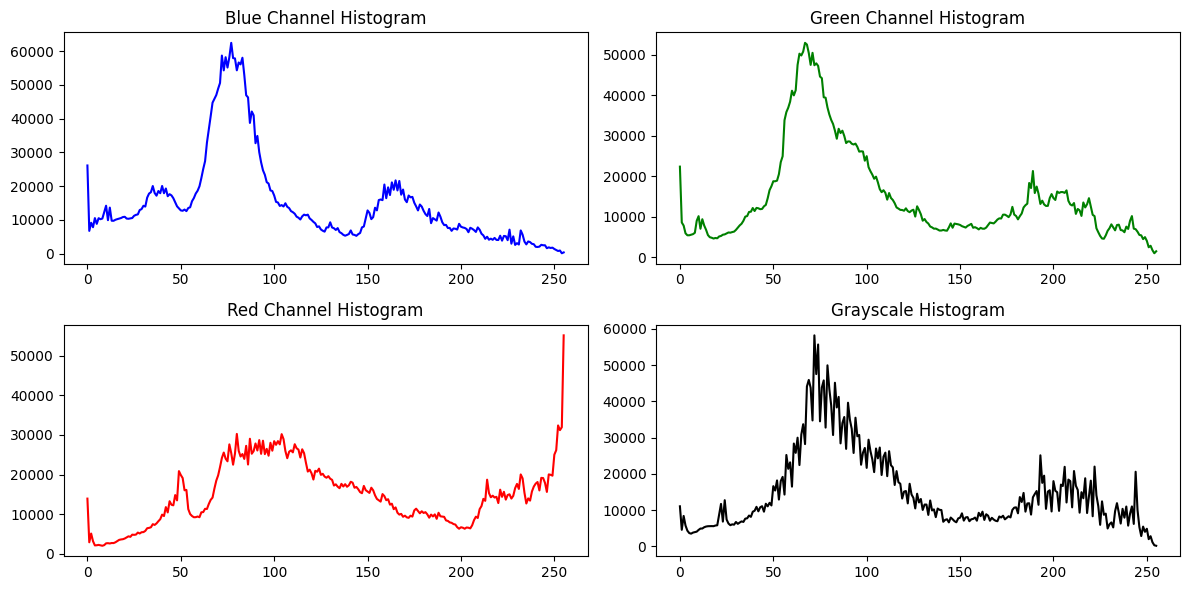

In [28]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'image' is your original image
output = image.copy()

# Convert the image to grayscale
gray_image = cv2.cvtColor(output, cv2.COLOR_BGR2GRAY)

# Calculate histograms for each color channel and the grayscale image
hist_blue = cv2.calcHist([output], [0], None, [256], [0, 256])
hist_green = cv2.calcHist([output], [1], None, [256], [0, 256])
hist_red = cv2.calcHist([output], [2], None, [256], [0, 256])
hist_gray = cv2.calcHist([gray_image], [0], None, [256], [0, 256])

# Plot histograms
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.plot(hist_blue, color='blue')
plt.title('Blue Channel Histogram')

plt.subplot(2, 2, 2)
plt.plot(hist_green, color='green')
plt.title('Green Channel Histogram')

plt.subplot(2, 2, 3)
plt.plot(hist_red, color='red')
plt.title('Red Channel Histogram')

plt.subplot(2, 2, 4)
plt.plot(hist_gray, color='black')
plt.title('Grayscale Histogram')

plt.tight_layout()
plt.show()


More
https://www.geeksforgeeks.org/opencv-python-tutorial/